In [1]:
#Importing necessary libraries and uploading the dataset as a Pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/afsaln2/Desktop/kaggle/icfos/project/dataset/cleveland.csv", header = None)


In [2]:
#Inspecting the data by printing the first five rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


We have to give header names for the columns

In [3]:
#Assigning names to columns based on datatype description
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
#Looking for null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

We find that there are total 6 NA values (4 in column 'ca' and 2 in column 'thal'
Since the number of NA values are low, we can simply replace them with the mean values of the dataset
The 'target' column has four distinct values. '0' meaning no heart disease and '1','2','3', '4' meaning existence of heart disease. 
For easy categoric analysis, we map values '2','3','4' to '1'
So, in the target column, '0' means the patient does not have heart ailment and '1' means the patient has heart ailment

In [6]:
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})


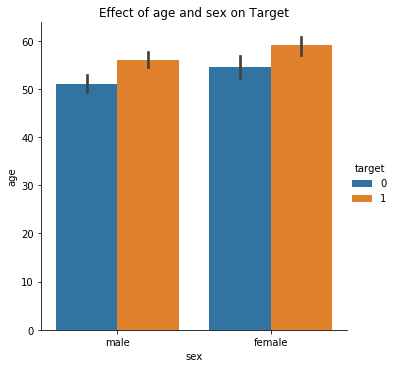

In [7]:
#Using categoric plot from seaborn to visualise the data
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Effect of age and sex on Target')
plt.show()

In [8]:
#Mapping the 'sex' column to intiger values 0 and 1
df['sex'] = df.sex.map({'female': 0, 'male': 1})



Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7704918032786885
[[29  6]
 [ 8 18]]


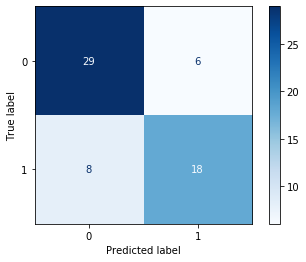

In [18]:
#Using a Decision Tree model

#Initialising features x and target y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#Model selection, splitting to test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Applying the classifier
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier1.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

#Storing measures of accuracy to two variables
acc_train_decision_tree = ((cm_train[0][0] + cm_train[1][1])/len(y_train))
acc_test_decision_tree = ((cm_test[0][0] + cm_test[1][1])/len(y_test))

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

#Plotting the confusion matrix
disp = plot_confusion_matrix(classifier1, X_test, y_test,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
plt.show()





Accuracy for training set for Random Forest = 0.9917355371900827
Accuracy for test set for Random Forest = 0.7868852459016393
[[31  4]
 [ 9 17]]


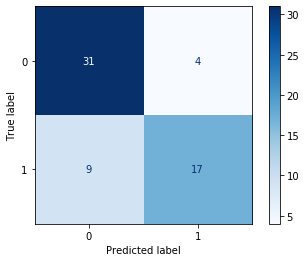

In [10]:
#Repeating the same process with a Random Forest Classifier

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier2.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier2.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

acc_train_rf=((cm_train[0][0] + cm_train[1][1])/len(y_train))
acc_test_rf=((cm_test[0][0] + cm_test[1][1])/len(y_test))
print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


#Plotting the confusion matrix
disp = plot_confusion_matrix(classifier2, X_test, y_test,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
plt.show()



In [11]:
data=[float(num) for num in (input("""Enter data of the patient in the order, seperated by space \nAge\nSex\nChest Pain Type (1/2/3/4)
Resting Blood Pressure \nSerum Cholestrol\nFasting Blood Sugar
Resting ECG (0/1/2) \nMax heart rate achieved \nExercise Induced Angine (0 - No/1 - Yes)
ST depression induced by exercise relative to rest
Peak exercise ST segment \nNumber of major vessels colored by flourosopy (0–3)
Thalassemia (Thalassemia :3 = normal, 6 = fixed defect,7 = reversible defect)""").strip().split())]
print(data)

Enter data of the patient in the order, seperated by space 
Age
Sex
Chest Pain Type (1/2/3/4)
Resting Blood Pressure 
Serum Cholestrol
Fasting Blood Sugar
Resting ECG (0/1/2) 
Max heart rate achieved 
Exercise Induced Angine (0 - No/1 - Yes)
ST depression induced by exercise relative to rest
Peak exercise ST segment 
Number of major vessels colored by flourosopy (0–3)
Thalassemia (Thalassemia :3 = normal, 6 = fixed defect,7 = reversible defect)56 0 2 150 120 120 1 75 0 0 6 0 3
[56.0, 0.0, 2.0, 150.0, 120.0, 120.0, 1.0, 75.0, 0.0, 0.0, 6.0, 0.0, 3.0]


In [12]:
prediction1 = classifier1.predict([data])
print("Prediction from Decision Tree Classifier", prediction1)
prediction2=classifier2.predict([data])
print("Prediction from Random Forest Classifier", prediction2)
print("Prediction 1 refers to possibility of heart disease and 0 referes to no possibility")

Prediction from Decision Tree Classifier [0]
Prediction from Random Forest Classifier [0]
Prediction 1 refers to possibility of heart disease and 0 referes to no possibility
